# Training CNN model using CIFAR-10 Dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten , BatchNormalization

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
print('x_train shape' , x_train.shape)
print('y_train shape' , y_train.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)


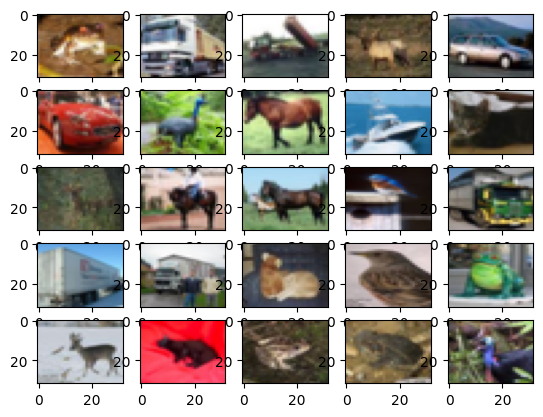

In [6]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

In [7]:
def normalize(x):
    x = x.astype('float32')
    x = x/255.0
    return x

In [8]:
datagen = ImageDataGenerator(
                            rotation_range=20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [9]:
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=0)

In [10]:
x_train = normalize(x_train)
x_test = normalize(x_test)
x_val = normalize(x_val)

y_train = tf.keras.utils.to_categorical(y_train , 10)
y_test = tf.keras.utils.to_categorical(y_test , 10)
y_val  = tf.keras.utils.to_categorical(y_val , 10)

datagen.fit(x_train)
train_generator = datagen.flow(x_train, y_train, batch_size=32)

In [11]:
# create_model using CNN
def create_model():
    weight_decay = 1e-4
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(32, 32, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')                    
    ])
    
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
                  
    return model


In [12]:
# Get the untrained model
model = create_model()

# Train the model
hist = model.fit(train_generator,
          epochs=100,
          steps_per_epoch=len(x_train)/32,
          verbose=1, 
          validation_data=(x_val, y_val))

Epoch 1/100
1562/1562 [==============================] - 40s 24ms/step - loss: 1.8626 - accuracy: 0.3330 - val_loss: 1.7358 - val_accuracy: 0.4122
Epoch 2/100
1562/1562 [==============================] - 36s 23ms/step - loss: 1.5862 - accuracy: 0.4329 - val_loss: 1.4321 - val_accuracy: 0.4970
Epoch 3/100
1562/1562 [==============================] - 36s 23ms/step - loss: 1.4694 - accuracy: 0.4786 - val_loss: 1.3313 - val_accuracy: 0.5274
Epoch 4/100
1562/1562 [==============================] - 37s 23ms/step - loss: 1.3755 - accuracy: 0.5170 - val_loss: 1.8042 - val_accuracy: 0.4210
Epoch 5/100
1562/1562 [==============================] - 37s 23ms/step - loss: 1.3092 - accuracy: 0.5432 - val_loss: 1.4577 - val_accuracy: 0.5066
Epoch 6/100
1562/1562 [==============================] - 36s 23ms/step - loss: 1.2528 - accuracy: 0.5646 - val_loss: 1.2570 - val_accuracy: 0.5742
Epoch 7/100
1562/1562 [==============================] - 36s 23ms/step - loss: 1.1978 - accuracy: 0.5865 - val_loss: 1

157/157 [==============================] - 1s 7ms/step - loss: 0.5026 - accuracy: 0.8478
test set loss :  0.5026447176933289
test set accuracy : 84.78000164031982


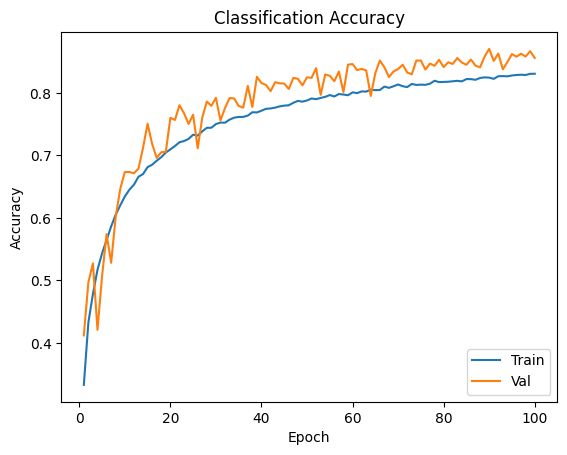

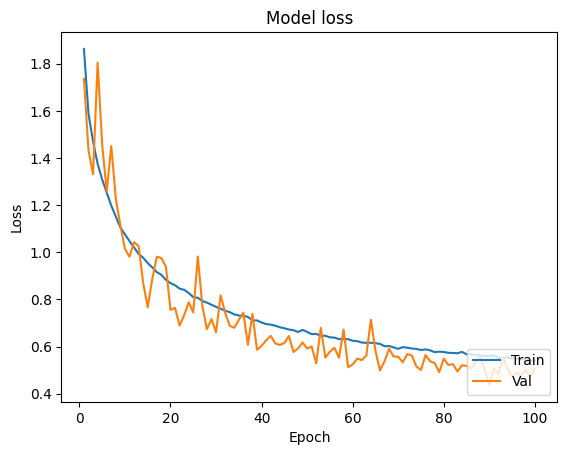

In [13]:
acc = model.evaluate(x_test, y_test)
print("test set loss : ", acc[0])
print("test set accuracy :", acc[1]*100)

epoch_range = range(1, 100+1)
plt.plot(epoch_range, hist.history['accuracy'])
plt.plot(epoch_range, hist.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, hist.history['loss'])
plt.plot(epoch_range, hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [14]:
model.save("model.hdf5")

###### 